<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.imageprocessing/blob/main/ImageProcessing_Nhom6_Tuan10-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!git clone https://github.com/nguyenvudev20/mse22.imageprocessing.git tuan1

fatal: destination path 'tuan1' already exists and is not an empty directory.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
from skimage.util import random_noise
fz=10

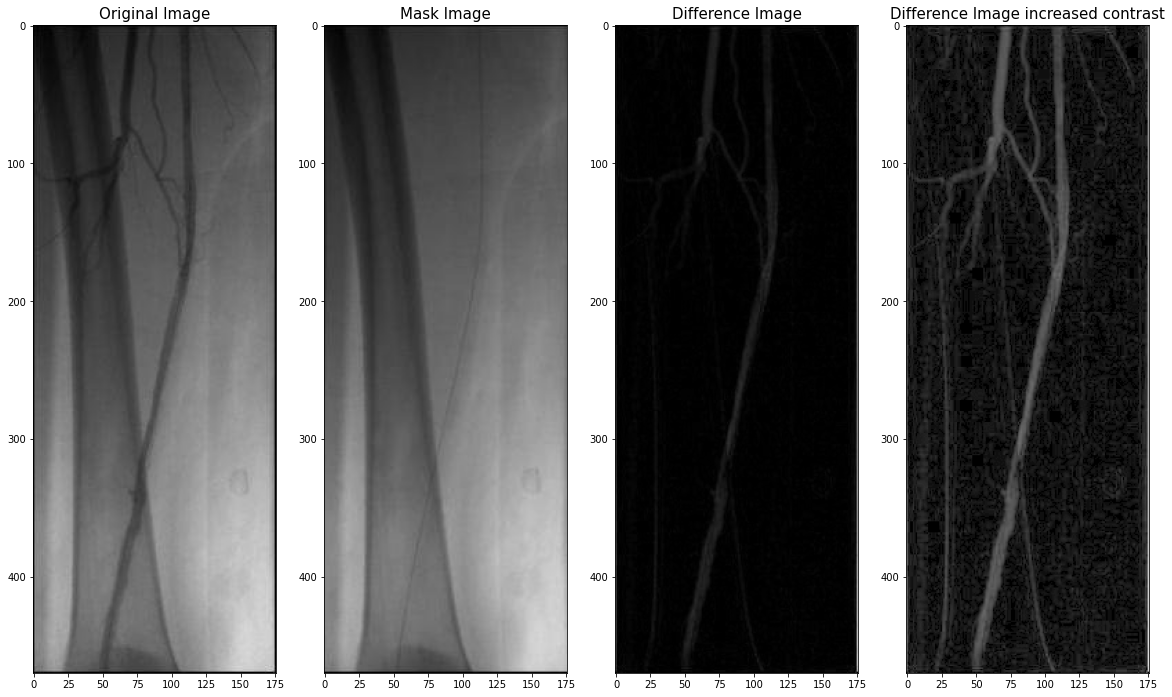

True

In [ ]:
#@title Bài Tập Tuần 1 - L5_1_Image_Subtraction
# load test images
#url_live = "https://raw.githubusercontent.com/nguyenvudev20/mse22.imageprocessing/main/image/live.jpg"
#with urllib.request.urlopen(url_live) as url:
#    arr_live = np.asarray(bytearray(url.read()), dtype=np.uint8)
#liveImg = cv2.imdecode(arr_live, cv2.IMREAD_COLOR).astype(np.float32) / 255.0

liveImg = cv2.imread('tuan1/image/live.jpg').astype(np.float32) / 255.0
maskImg = cv2.imread('tuan1/image/mask.jpg').astype(np.float32) / 255.0

# calculate the difference between two images
diffImg = np.abs(maskImg-liveImg)
gamma = 0.5
diffImg_contrasted = np.power(diffImg, gamma)

# show image
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 12))
fz=15
ax[0].imshow(liveImg)
ax[0].set_title('Original Image',fontsize=fz)

ax[1].imshow(maskImg)
ax[1].set_title('Mask Image',fontsize=fz)

ax[2].imshow(diffImg)
ax[2].set_title('Difference Image',fontsize=fz)

ax[3].imshow(diffImg_contrasted)
ax[3].set_title('Difference Image increased contrast',fontsize=fz)
plt.show()

#plt.subplot(2, 2, 1), plt.imshow(liveImg), plt.title('Original Image')
#plt.subplot(2, 2, 2), plt.imshow(maskImg), plt.title('Mask Image')
#plt.subplot(2, 2, 3), plt.imshow(diffImg), plt.title('Difference Image')
#plt.subplot(2, 2, 4), plt.imshow(diffImg_contrasted), plt.title('Difference Image increased contrast')
# save images
cv2.imwrite('Image_Subtraction.jpg', np.uint8(diffImg * 255.0))
cv2.imwrite('Image_Subtraction_with_contrast.jpg', np.uint8(diffImg_contrasted * 255.0))




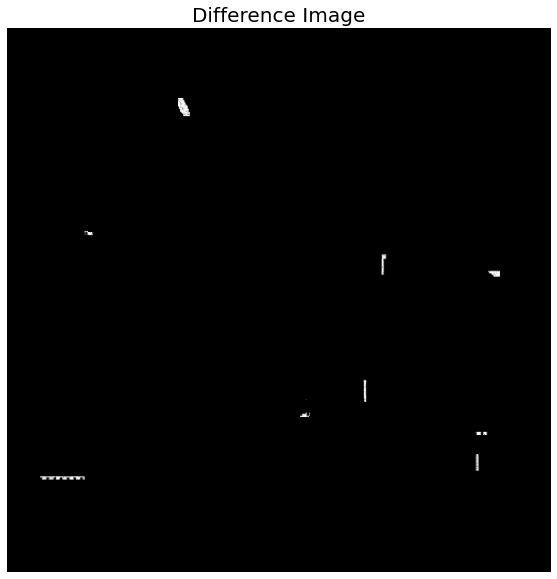

True

In [ ]:
#@title Bài Tập Tuần 1 - L5_2_Image_Comparison
# load test images

maskImg1 = cv2.imread('tuan1/image/mask1.png').astype(np.float32) / 255.0
maskImg2 = cv2.imread('tuan1/image/mask2.png').astype(np.float32) / 255.0
diffImg = np.abs(maskImg1 - maskImg2)
fz=20
plt.figure(figsize=(10, 10))
plt.imshow(diffImg, cmap='gray')
plt.title('Difference Image',fontsize=fz)
plt.axis('off')
plt.show()

cv2.imwrite('Mask_Compasion_diff.png', np.uint8(diffImg * 255.0))

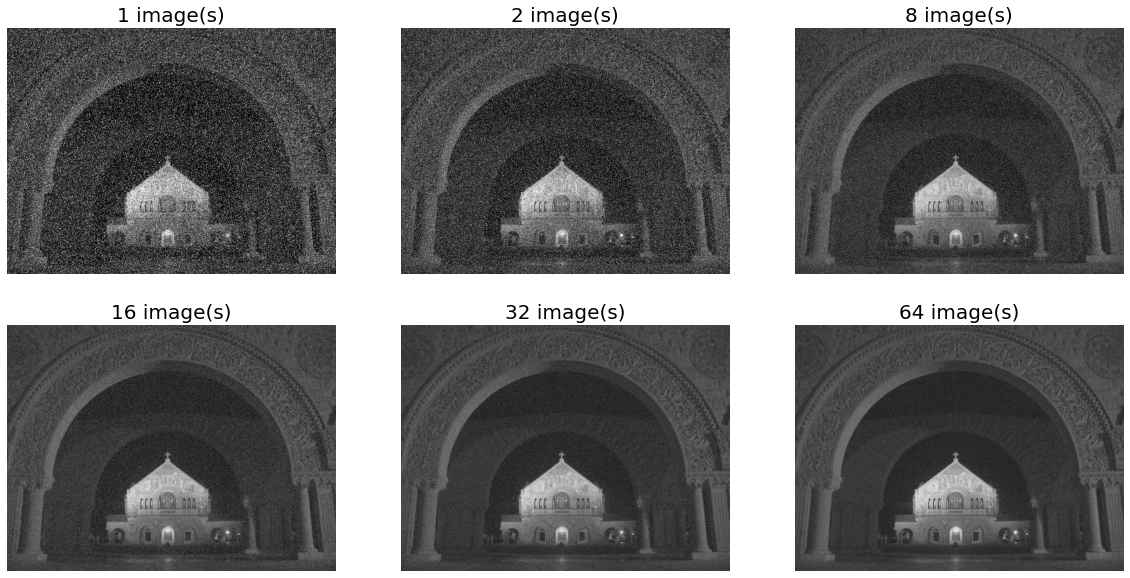

In [ ]:
#@title Bài Tập Tuần 1 - L5_3_Image_Averaging

Img = cv2.imread('tuan1/image/quadnight.jfif')
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY) / 255.0

# Repeat over number of sample images
nArray = [1, 2, 8, 16, 32, 64]
num_cols = len(nArray) // 2
fz=20
plt.figure(figsize=(20, 10))
for i in range(len(nArray)):
    N = nArray[i]
    avgImg = np.zeros_like(Img)  # Initialize an empty image

    # Add Gaussian noise to each image, accumulate this image to average image
    for j in range(N):
        #noisyImg = cv2.GaussianBlur(Img, (3, 3), 0.01)        
        #noisyImg = random_noise(Img, mode='gaussian',seed=None, clip=True)
        noisyImg = random_noise(Img, mode='s&p', seed=None, clip=True,amount=0.3)
        avgImg = avgImg + noisyImg


    # Show image
    avgImg = avgImg / N
    
    
    plt.subplot(2, num_cols, i+1)
    plt.imshow(avgImg, cmap='gray')
    plt.title(str(N) + ' image(s)',fontsize=fz)
    plt.axis('off')

plt.show()